In [22]:
import geopandas as gpd
import shapely
import pandas as pd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

In [23]:
plt.rcParams['figure.dpi'] = 450

In [24]:
root_dir = '/Volumes/Data2/RST/notebook/'
simplify_dir = 'GTFS/TTC_2016-08-05/GIS Simplify/'
gtfs_dir = 'GTFS/TTC_2016-08-05/'

In [25]:
to = gpd.read_file(root_dir + 'GIS/toronto.geojson').to_crs(epsg = '32617')
wards = gpd.read_file(root_dir + 'GIS/wards_no-island.geojson').to_crs(epsg = '32617')

un_to = wards.copy().dissolve().envelope.symmetric_difference(wards.copy().dissolve())

centreline = gpd.read_file(root_dir + 'GIS/centreline.geojson').to_crs(epsg = '32617')
tts = gpd.read_file(root_dir + 'GIS/tts/tts.shp').to_crs(epsg = '32617')
island_mask = gpd.read_file(root_dir + 'GIS/island_mask.geojson').to_crs(epsg = '32617')

In [26]:
int_stop = pd.read_csv(root_dir + simplify_dir + 'int_stop_full.csv')[['INT_ID', 'int_lon', 'int_lat']]
int_stop = gpd.GeoDataFrame(int_stop, geometry=gpd.points_from_xy(int_stop['int_lon'], int_stop['int_lat']
                                                                 )).set_crs(epsg = '4326').to_crs(epsg = '32617')

In [27]:
for index, row in to.iterrows():
    rotated = shapely.affinity.rotate(row['geometry'], angle=-17, origin = Point(0, 0))
    to.at[index, 'geometry'] = rotated
    
for index, row in tts.iterrows():
    rotated = shapely.affinity.rotate(row['geometry'], angle=-17, origin = Point(0, 0))
    tts.at[index, 'geometry'] = rotated
    
for index, row in wards.iterrows():
    rotated = shapely.affinity.rotate(row['geometry'], angle=-17, origin = Point(0, 0))
    wards.at[index, 'geometry'] = rotated
    
for index, row in centreline.iterrows():
    rotated = shapely.affinity.rotate(row['geometry'], angle=-17, origin = Point(0, 0))
    centreline.at[index, 'geometry'] = rotated
    
for index, row in int_stop.iterrows():
    rotated = shapely.affinity.rotate(row['geometry'], angle=-17, origin = Point(0, 0))
    int_stop.at[index, 'geometry'] = rotated
    
for index, row in island_mask.iterrows():
    rotated = shapely.affinity.rotate(row['geometry'], angle=-17, origin = Point(0, 0))
    island_mask.at[index, 'geometry'] = rotated

In [28]:
un_to_gdf = to.copy()
rotated = shapely.affinity.rotate(un_to[0], angle=-17, origin = Point(0, 0))
un_to_gdf.at[index, 'geometry'] = rotated

In [29]:
expressway = centreline[centreline['FEATURE_CODE_DESC'].isin(['Expressway', 'Expressway Ramp'])]
major_arterial = centreline[centreline['FEATURE_CODE_DESC'].isin(['Major Arterial', 'Major Arterial Ramp'])]
minor_arterial = centreline[centreline['FEATURE_CODE_DESC'].isin(['Minor Arterial', 'Minor Arterial Ramp'])]
railway = centreline[centreline['FEATURE_CODE_DESC'].isin(['Railway'])]

In [30]:
data = pd.read_csv(root_dir + 'networks/EM/EM_connectivity.csv')
data.head()

,AREA_SHORT_CODE,skew,kurtosis,total_transfer_oppurtunities,multiple_edges,num_transfer_stops,connectivity,AREA_NAME
0,1,3.683248,12.044765,42.75,3.0,7,5.678571,Etobicoke North
1,2,4.851723,21.539216,14.00,0.0,2,7.000000,Etobicoke Centre
2,3,4.618553,20.998759,38.00,0.0,5,7.600000,Etobicoke-Lakeshore
3,4,5.216972,31.123559,110.00,2.0,9,12.000000,Parkdale-High Park
4,5,3.094081,7.748210,42.50,0.0,6,7.083333,York South-Weston


In [31]:
data = wards[['geometry', 'AREA_SHORT_CODE']].merge(data)

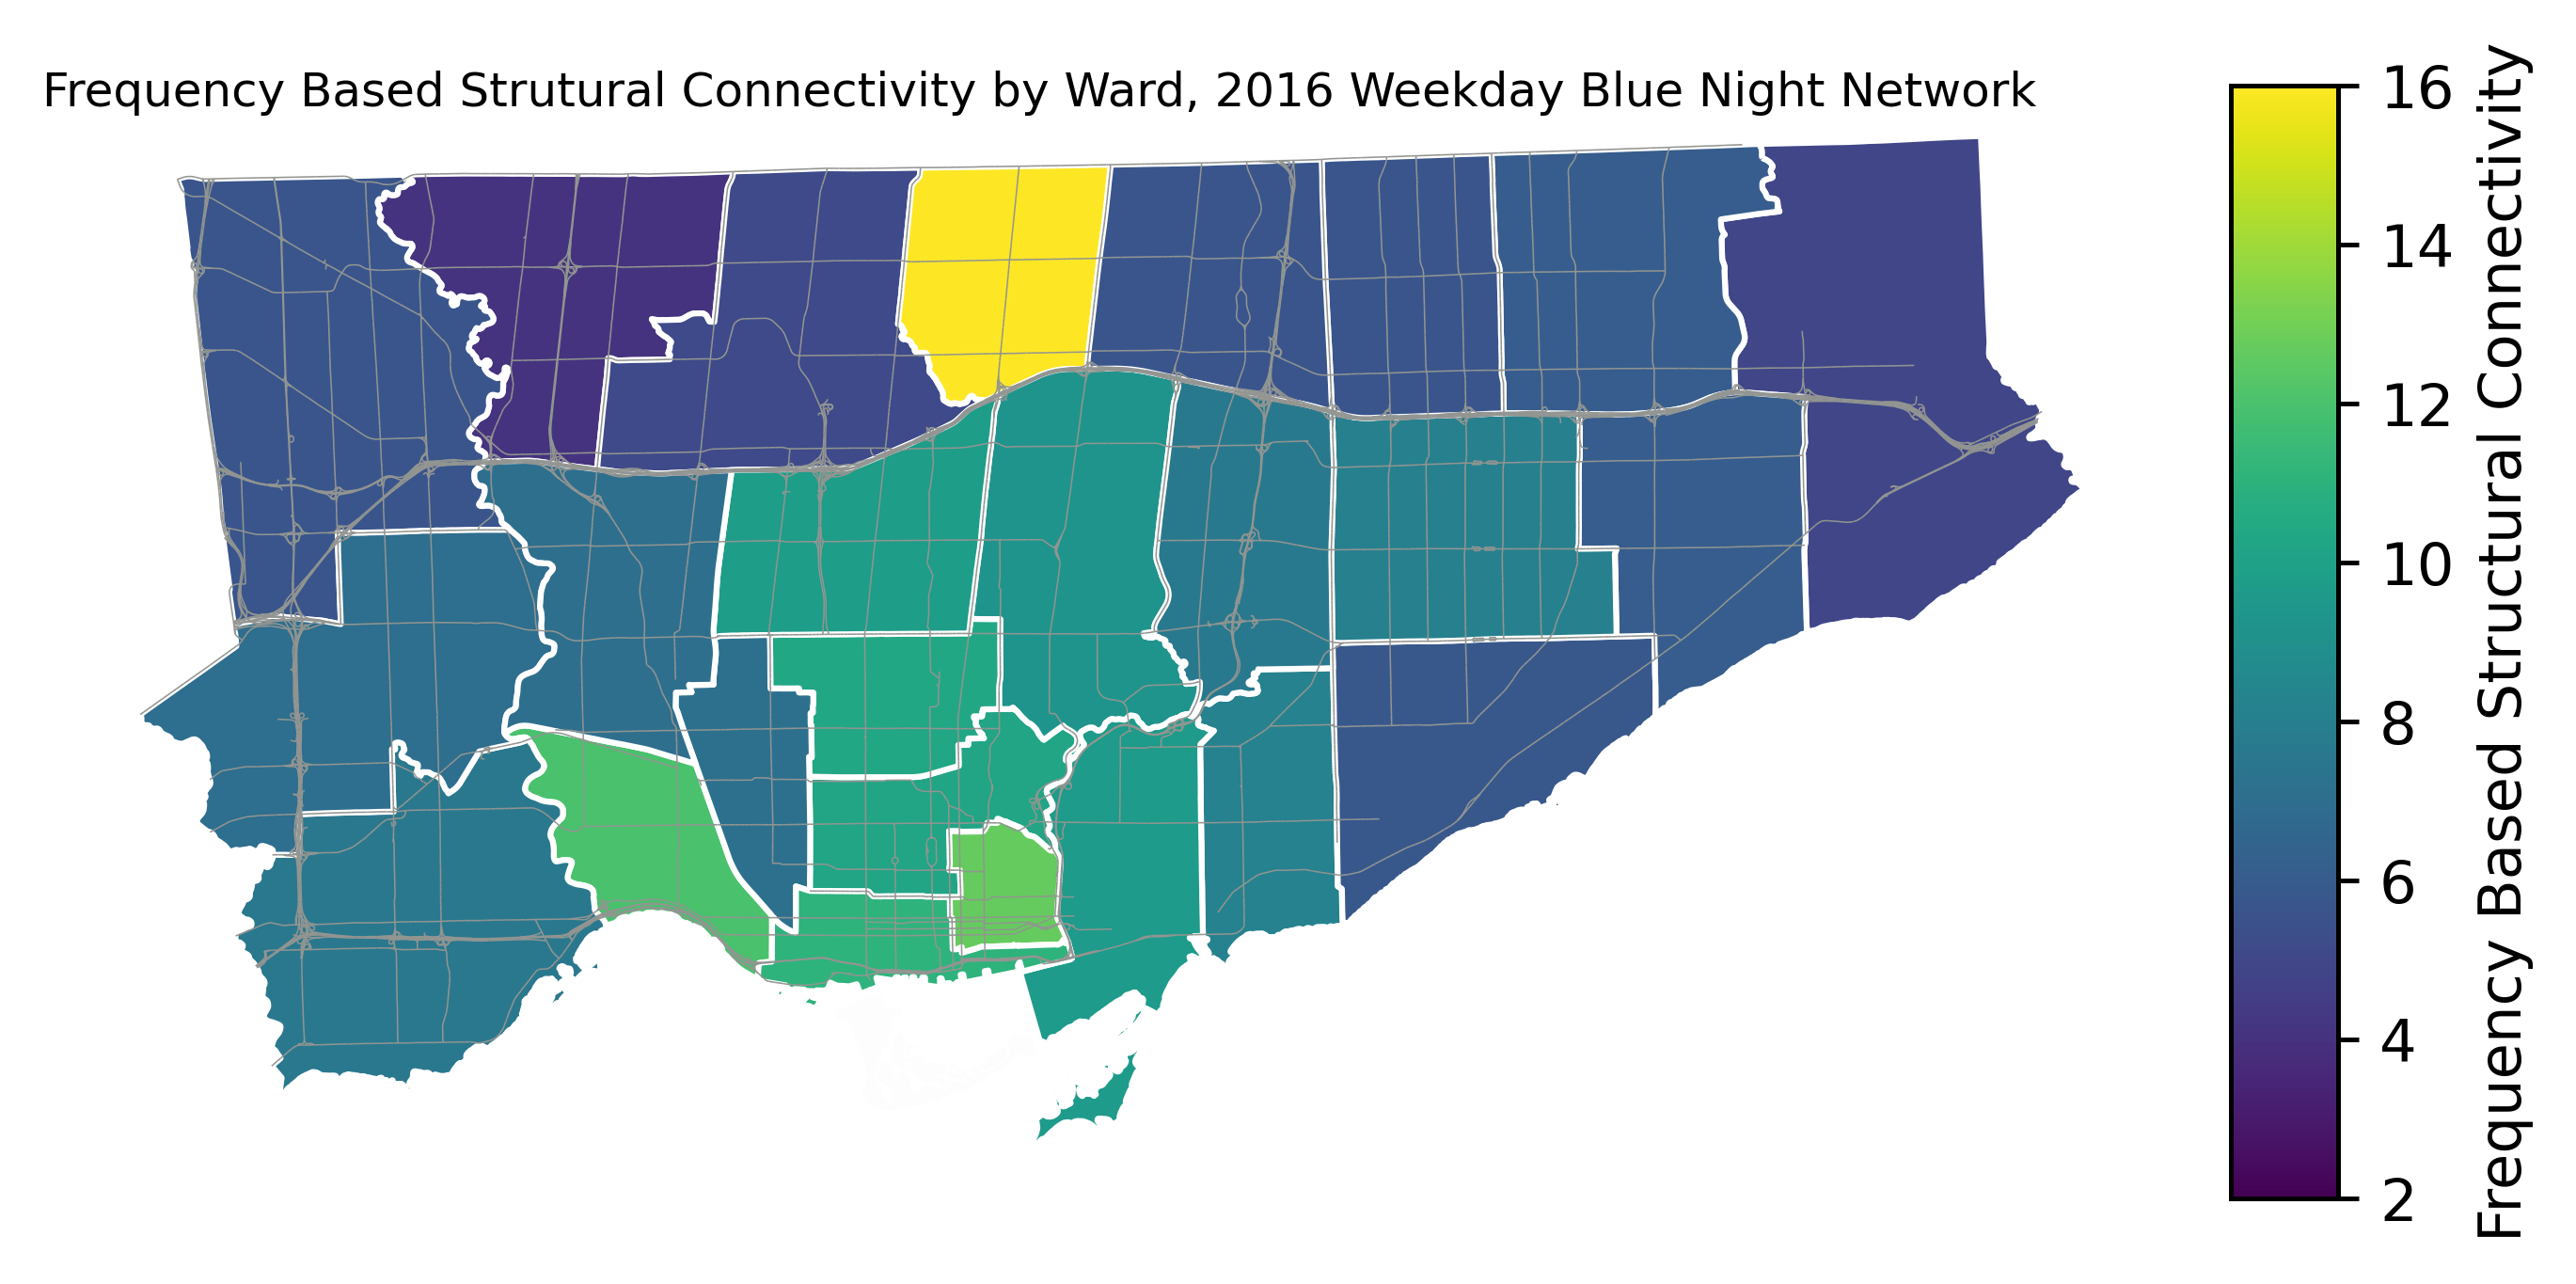

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(7,4)

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=0.1)

to.plot(zorder = 0, ax = ax, color = 'xkcd:pale grey')

data.plot(zorder = 1, ax = ax, vmin = 2, vmax = 16, column = 'connectivity', cmap = 'viridis', edgecolor = 'w', 
          legend = True, linewidth = 1, cax = cax, legend_kwds={'label': "Frequency Based Structural Connectivity"})

expressway.plot(zorder = 1, ax = ax, edgecolor = 'xkcd:grey', linewidth = 0.25)
major_arterial.plot(zorder = 1, ax = ax, edgecolor = 'xkcd:grey', linewidth = 0.25)
#tts.plot(zorder = 1, ax = ax, color = 'xkcd:green')

ax.set_title('Frequency Based Strutural Connectivity by Ward, 2016 Weekday Blue Night Network', ha = 'left', x = 0, y = 0.95, fontsize = 8)

ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_axis_off()

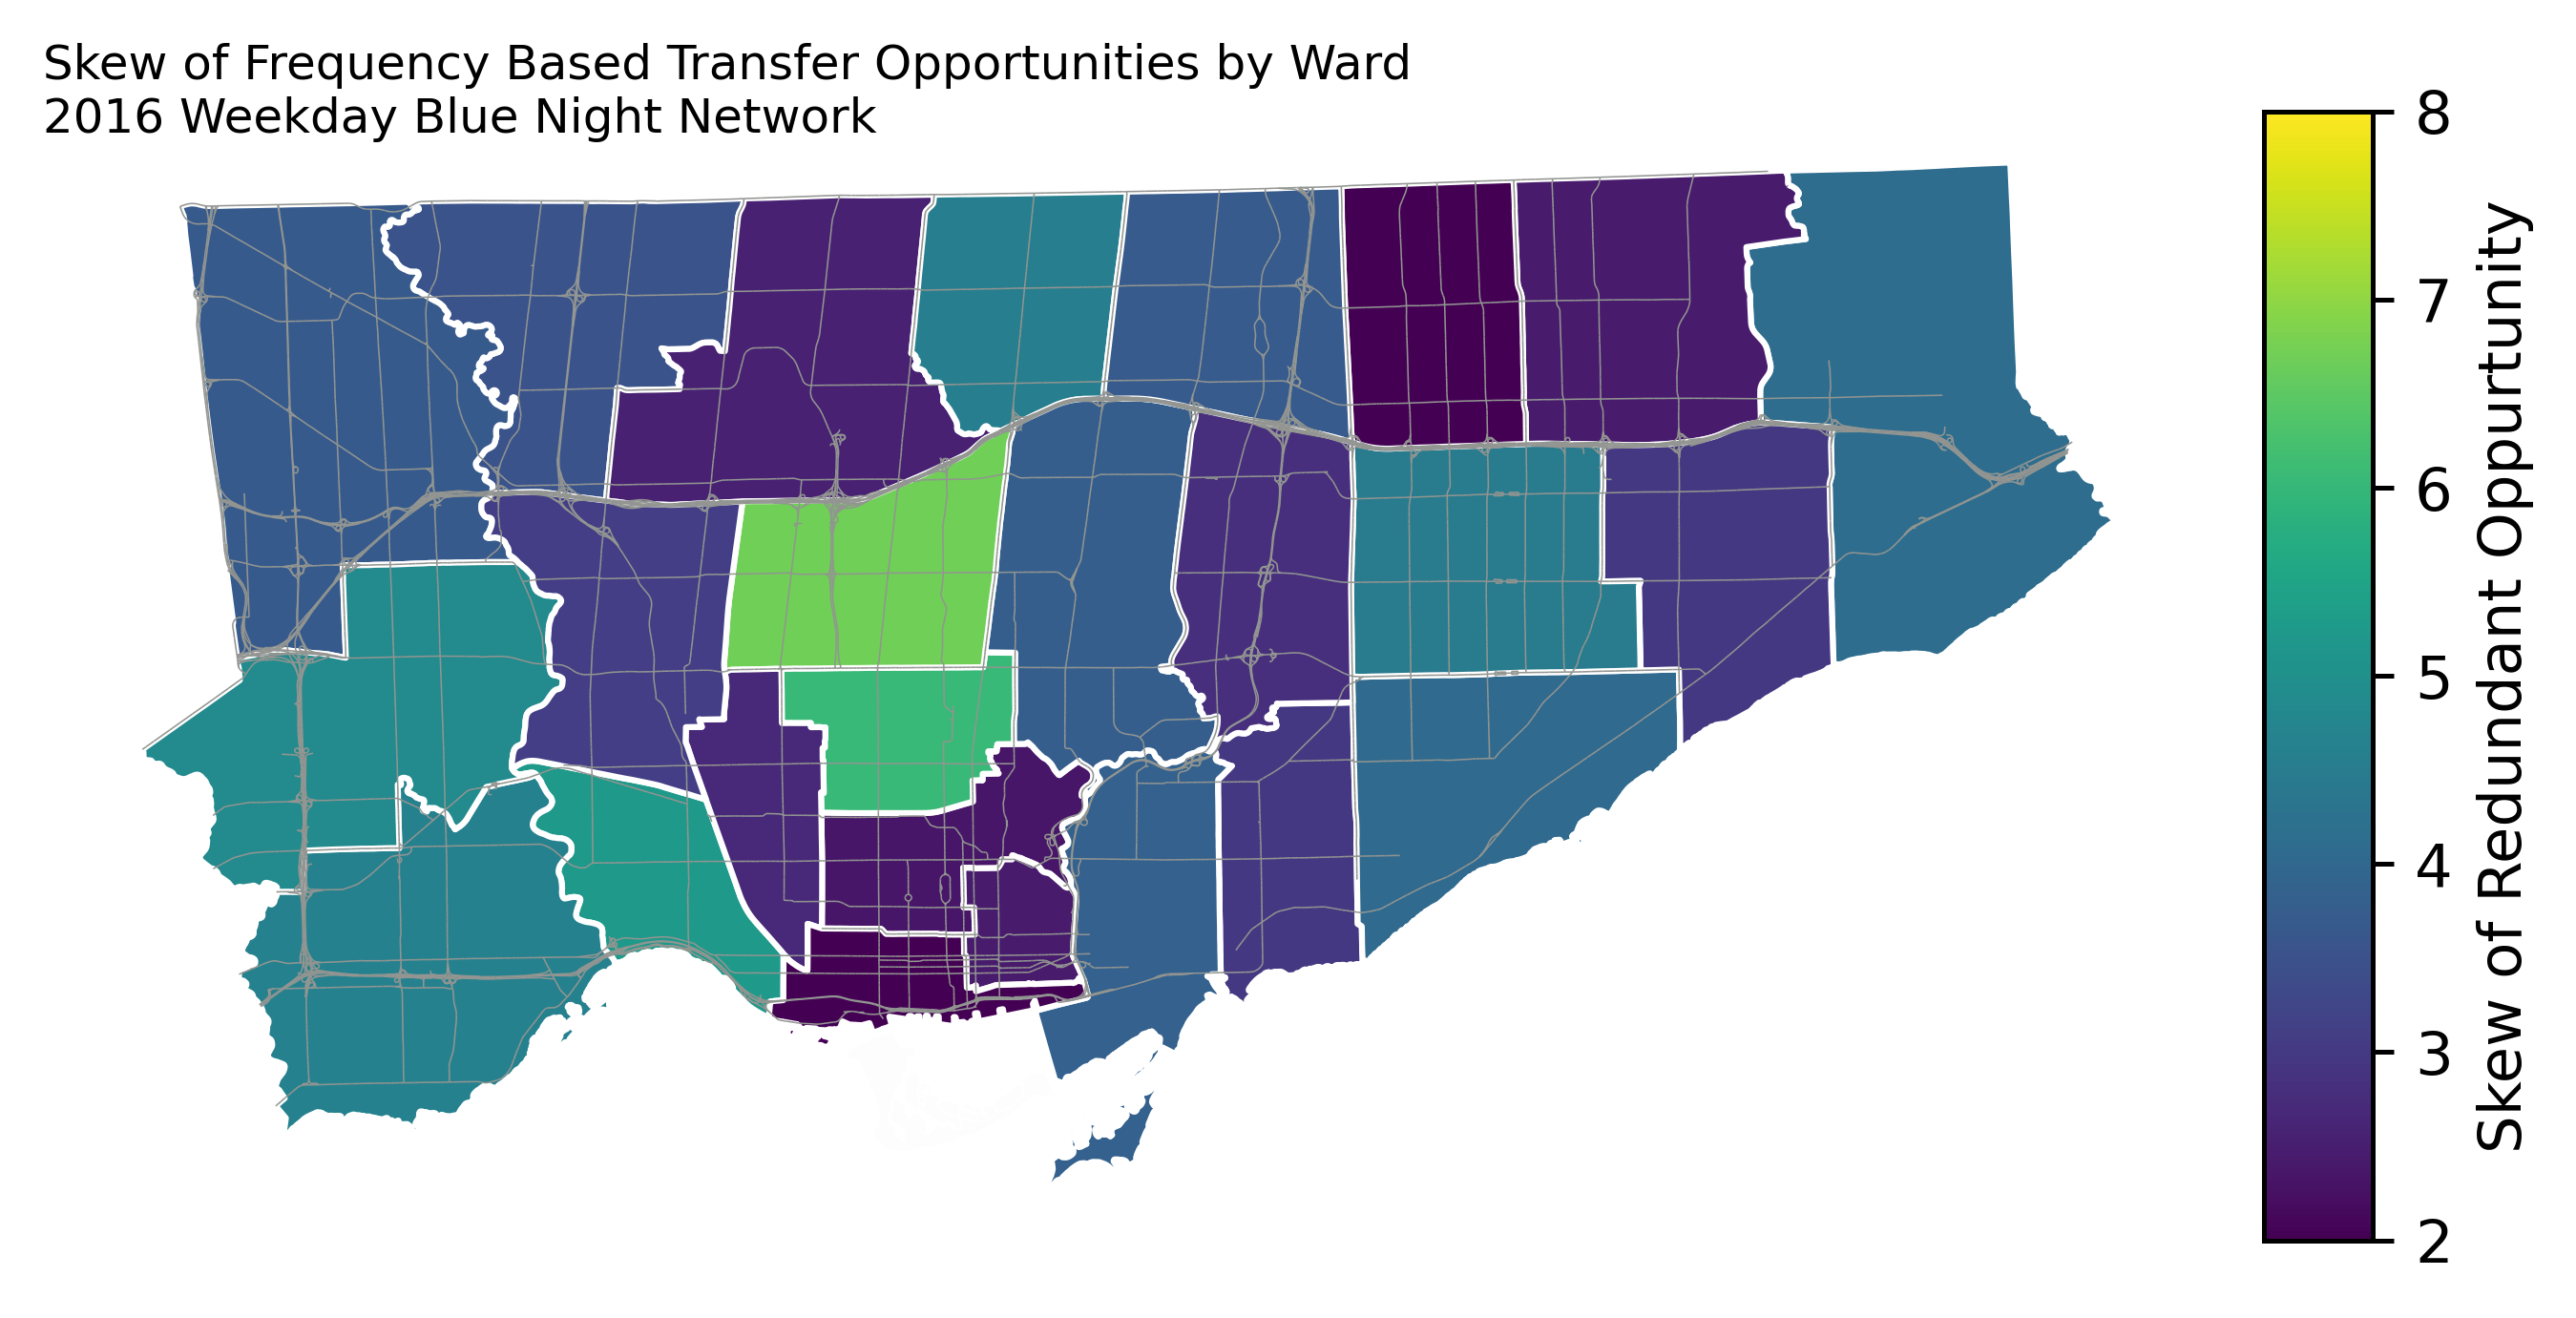

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(7,4)

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=0.1)

to.plot(zorder = 0, ax = ax, color = 'xkcd:pale grey')

data.plot(zorder = 1, ax = ax, vmin = 2, vmax = 8, column = 'skew', cmap = 'viridis', edgecolor = 'w', 
          legend = True, linewidth = 1, cax = cax, legend_kwds={'label': "Skew of Redundant Oppurtunity"})

expressway.plot(zorder = 1, ax = ax, edgecolor = 'xkcd:grey', linewidth = 0.25)
major_arterial.plot(zorder = 1, ax = ax, edgecolor = 'xkcd:grey', linewidth = 0.25)
#tts.plot(zorder = 1, ax = ax, color = 'xkcd:green')

ax.set_title('Skew of Frequency Based Transfer Opportunities by Ward\n2016 Weekday Blue Night Network', ha = 'left', x = 0, y = 0.95, fontsize = 8)

ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_axis_off()

In [34]:
transfer_poss = pd.read_csv(root_dir + 'networks/EM/EM_transfer-poss.csv')
transfer_poss = int_stop[['INT_ID', 'geometry']].merge(transfer_poss)
transfer_poss

,INT_ID,geometry,degree,route-direction,transfer-poss,int_lon,int_lat
0,206,POINT (2009886.289 4441003.873),7.5,0.0,0.00,-79.466748,43.654003
1,214,POINT (2015164.752 4441028.395),11.5,1.0,11.50,-79.403889,43.667249
2,209,POINT (2011929.520 4441026.242),9.0,0.0,0.00,-79.442463,43.659246
3,205,POINT (2009109.819 4440999.856),7.5,0.0,0.00,-79.475991,43.652048
4,110,POINT (2016627.624 4444134.471),16.0,0.0,0.00,-79.396989,43.697748
...,...,...,...,...,...,...,...
1515,14134889,POINT (2015962.698 4437596.913),4.0,0.0,0.00,-79.382725,43.639505
1516,13460830,POINT (2008984.162 4445027.517),3.0,0.0,0.00,-79.491218,43.686599
1517,100,POINT (2016277.851 4438171.280),15.5,0.5,7.75,-79.380916,43.645255
1518,13458803,POINT (2010530.137 4445814.602),4.0,0.0,0.00,-79.475460,43.697237


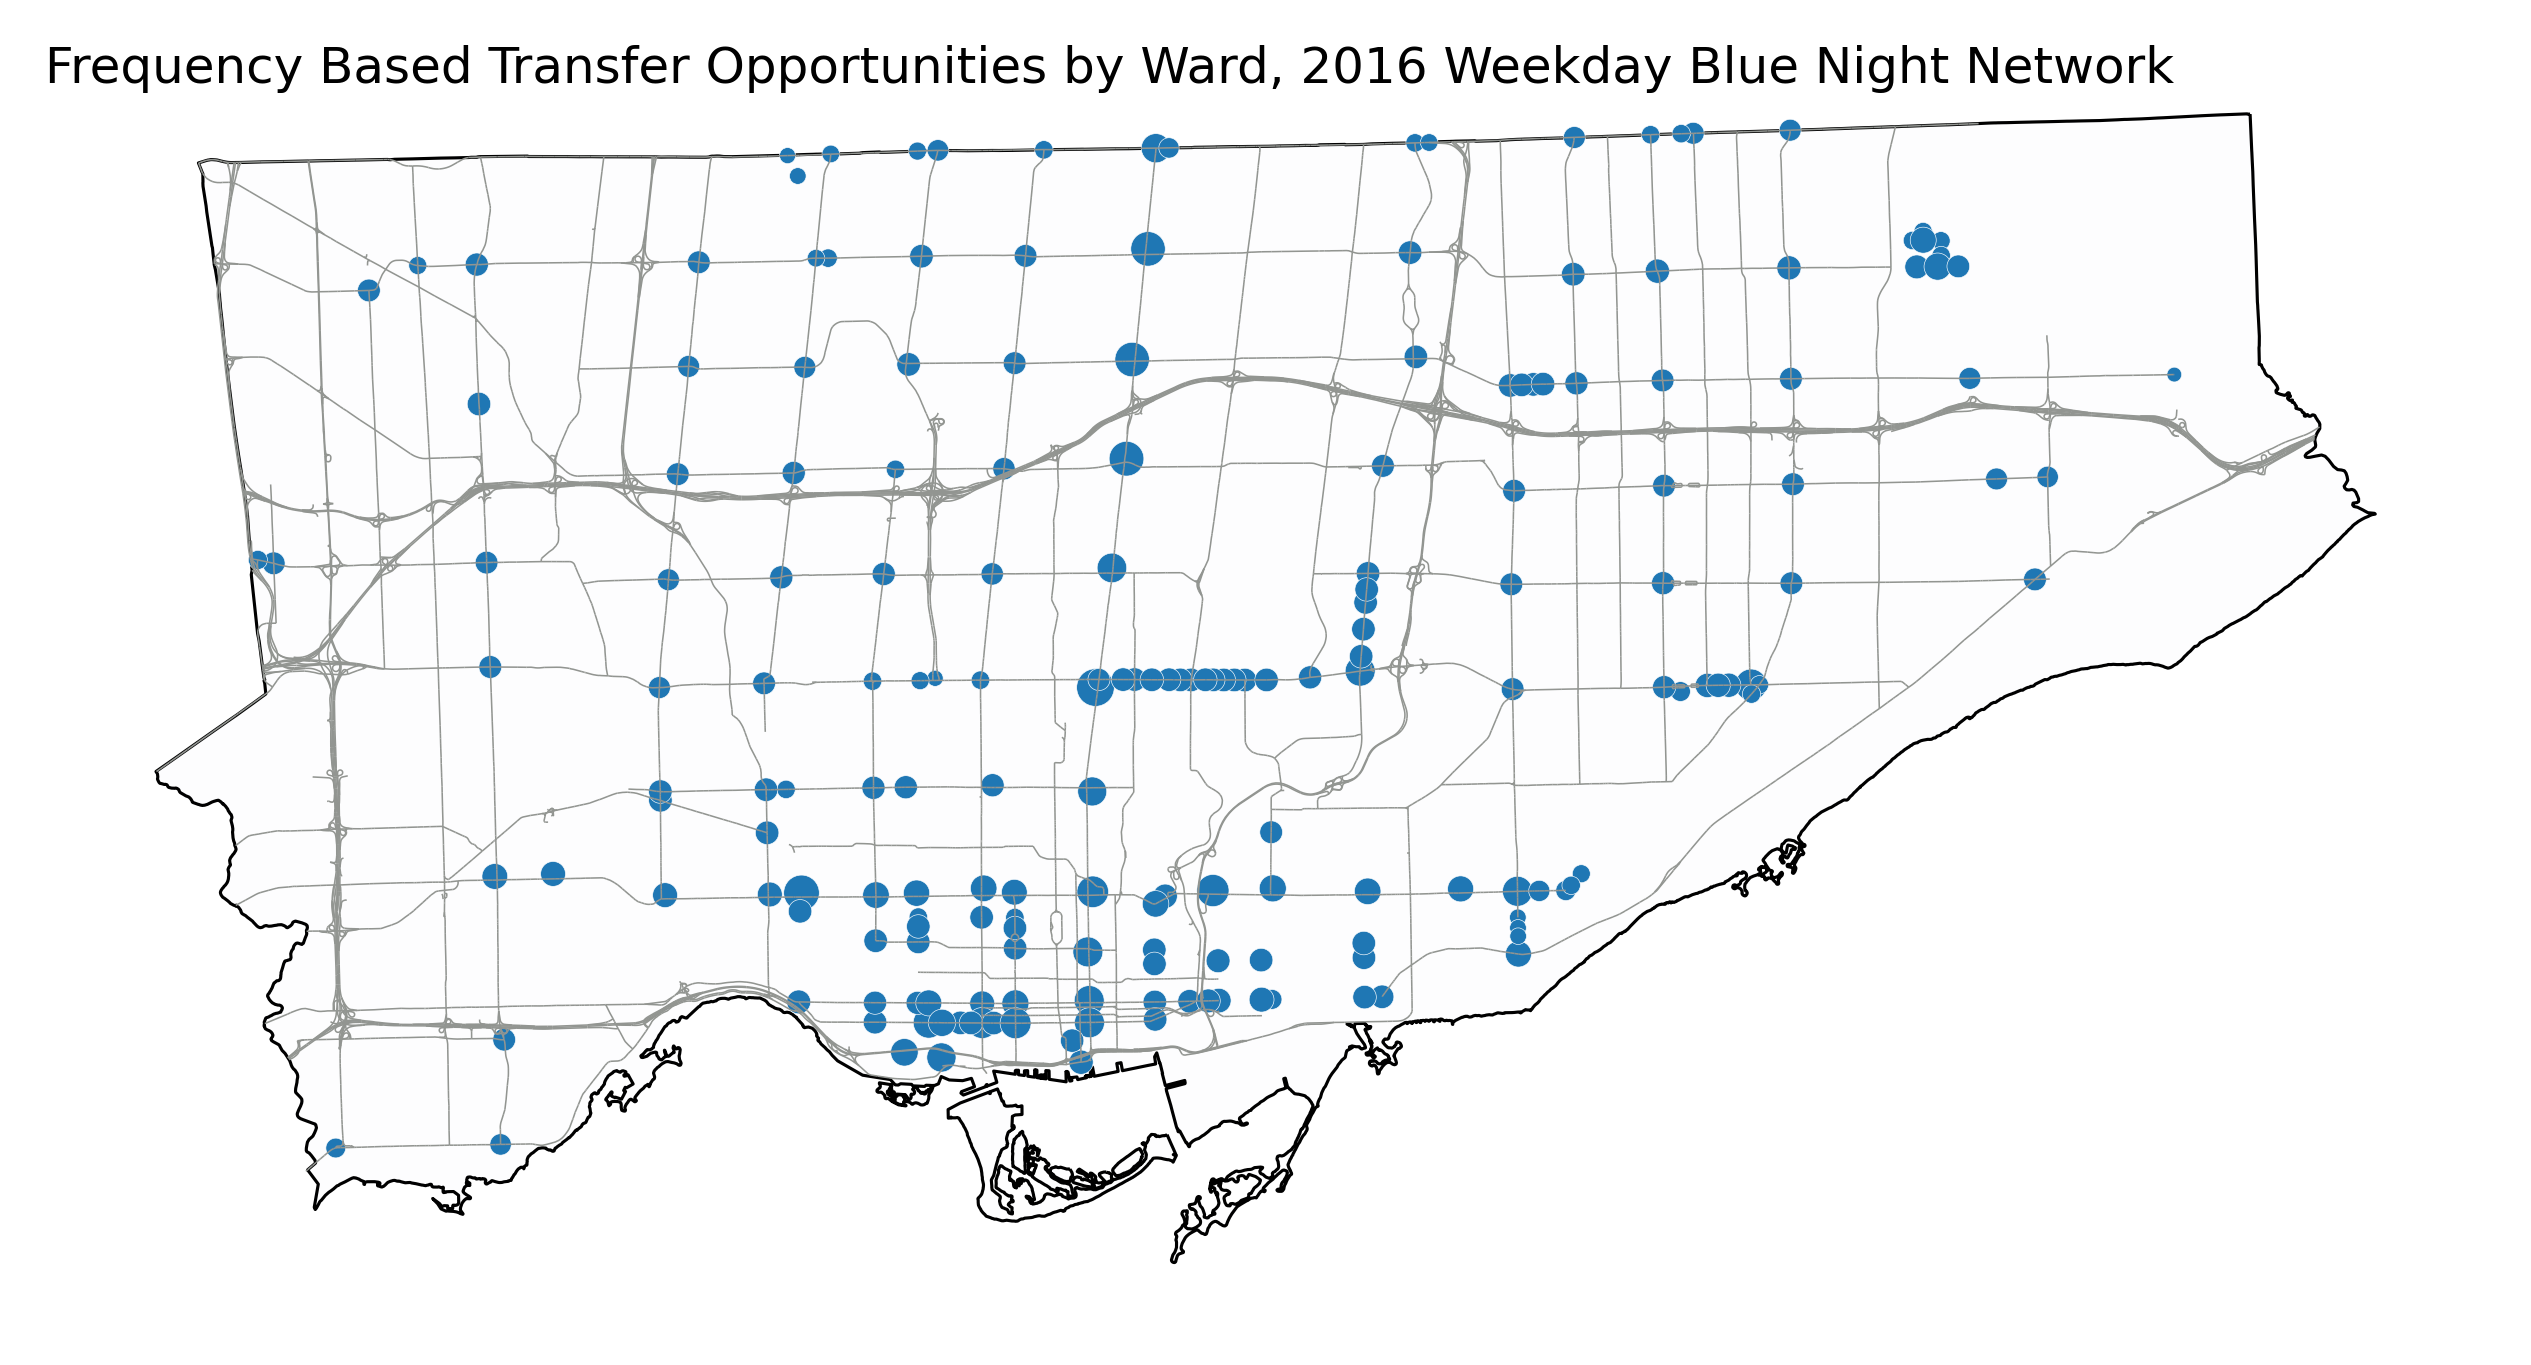

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(7,4)

to.plot(zorder = 0, ax = ax, color = 'xkcd:pale grey', linewidth = 0.5, edgecolor = 'k')


transfer_poss.plot(zorder = 1, ax = ax,edgecolor = 'w', linewidth = 0.1, 
                  markersize = 5*np.sqrt(transfer_poss['transfer-poss']))

expressway.plot(zorder = 1, ax = ax, edgecolor = 'xkcd:grey', linewidth = 0.25)
major_arterial.plot(zorder = 1, ax = ax, edgecolor = 'xkcd:grey', linewidth = 0.25)
#tts.plot(zorder = 1, ax = ax, color = 'xkcd:green')

ax.set_title('Frequency Based Transfer Opportunities by Ward, 2016 Weekday Blue Night Network', ha = 'left', x = 0, y = 0.95, fontsize = 8)

ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_axis_off()

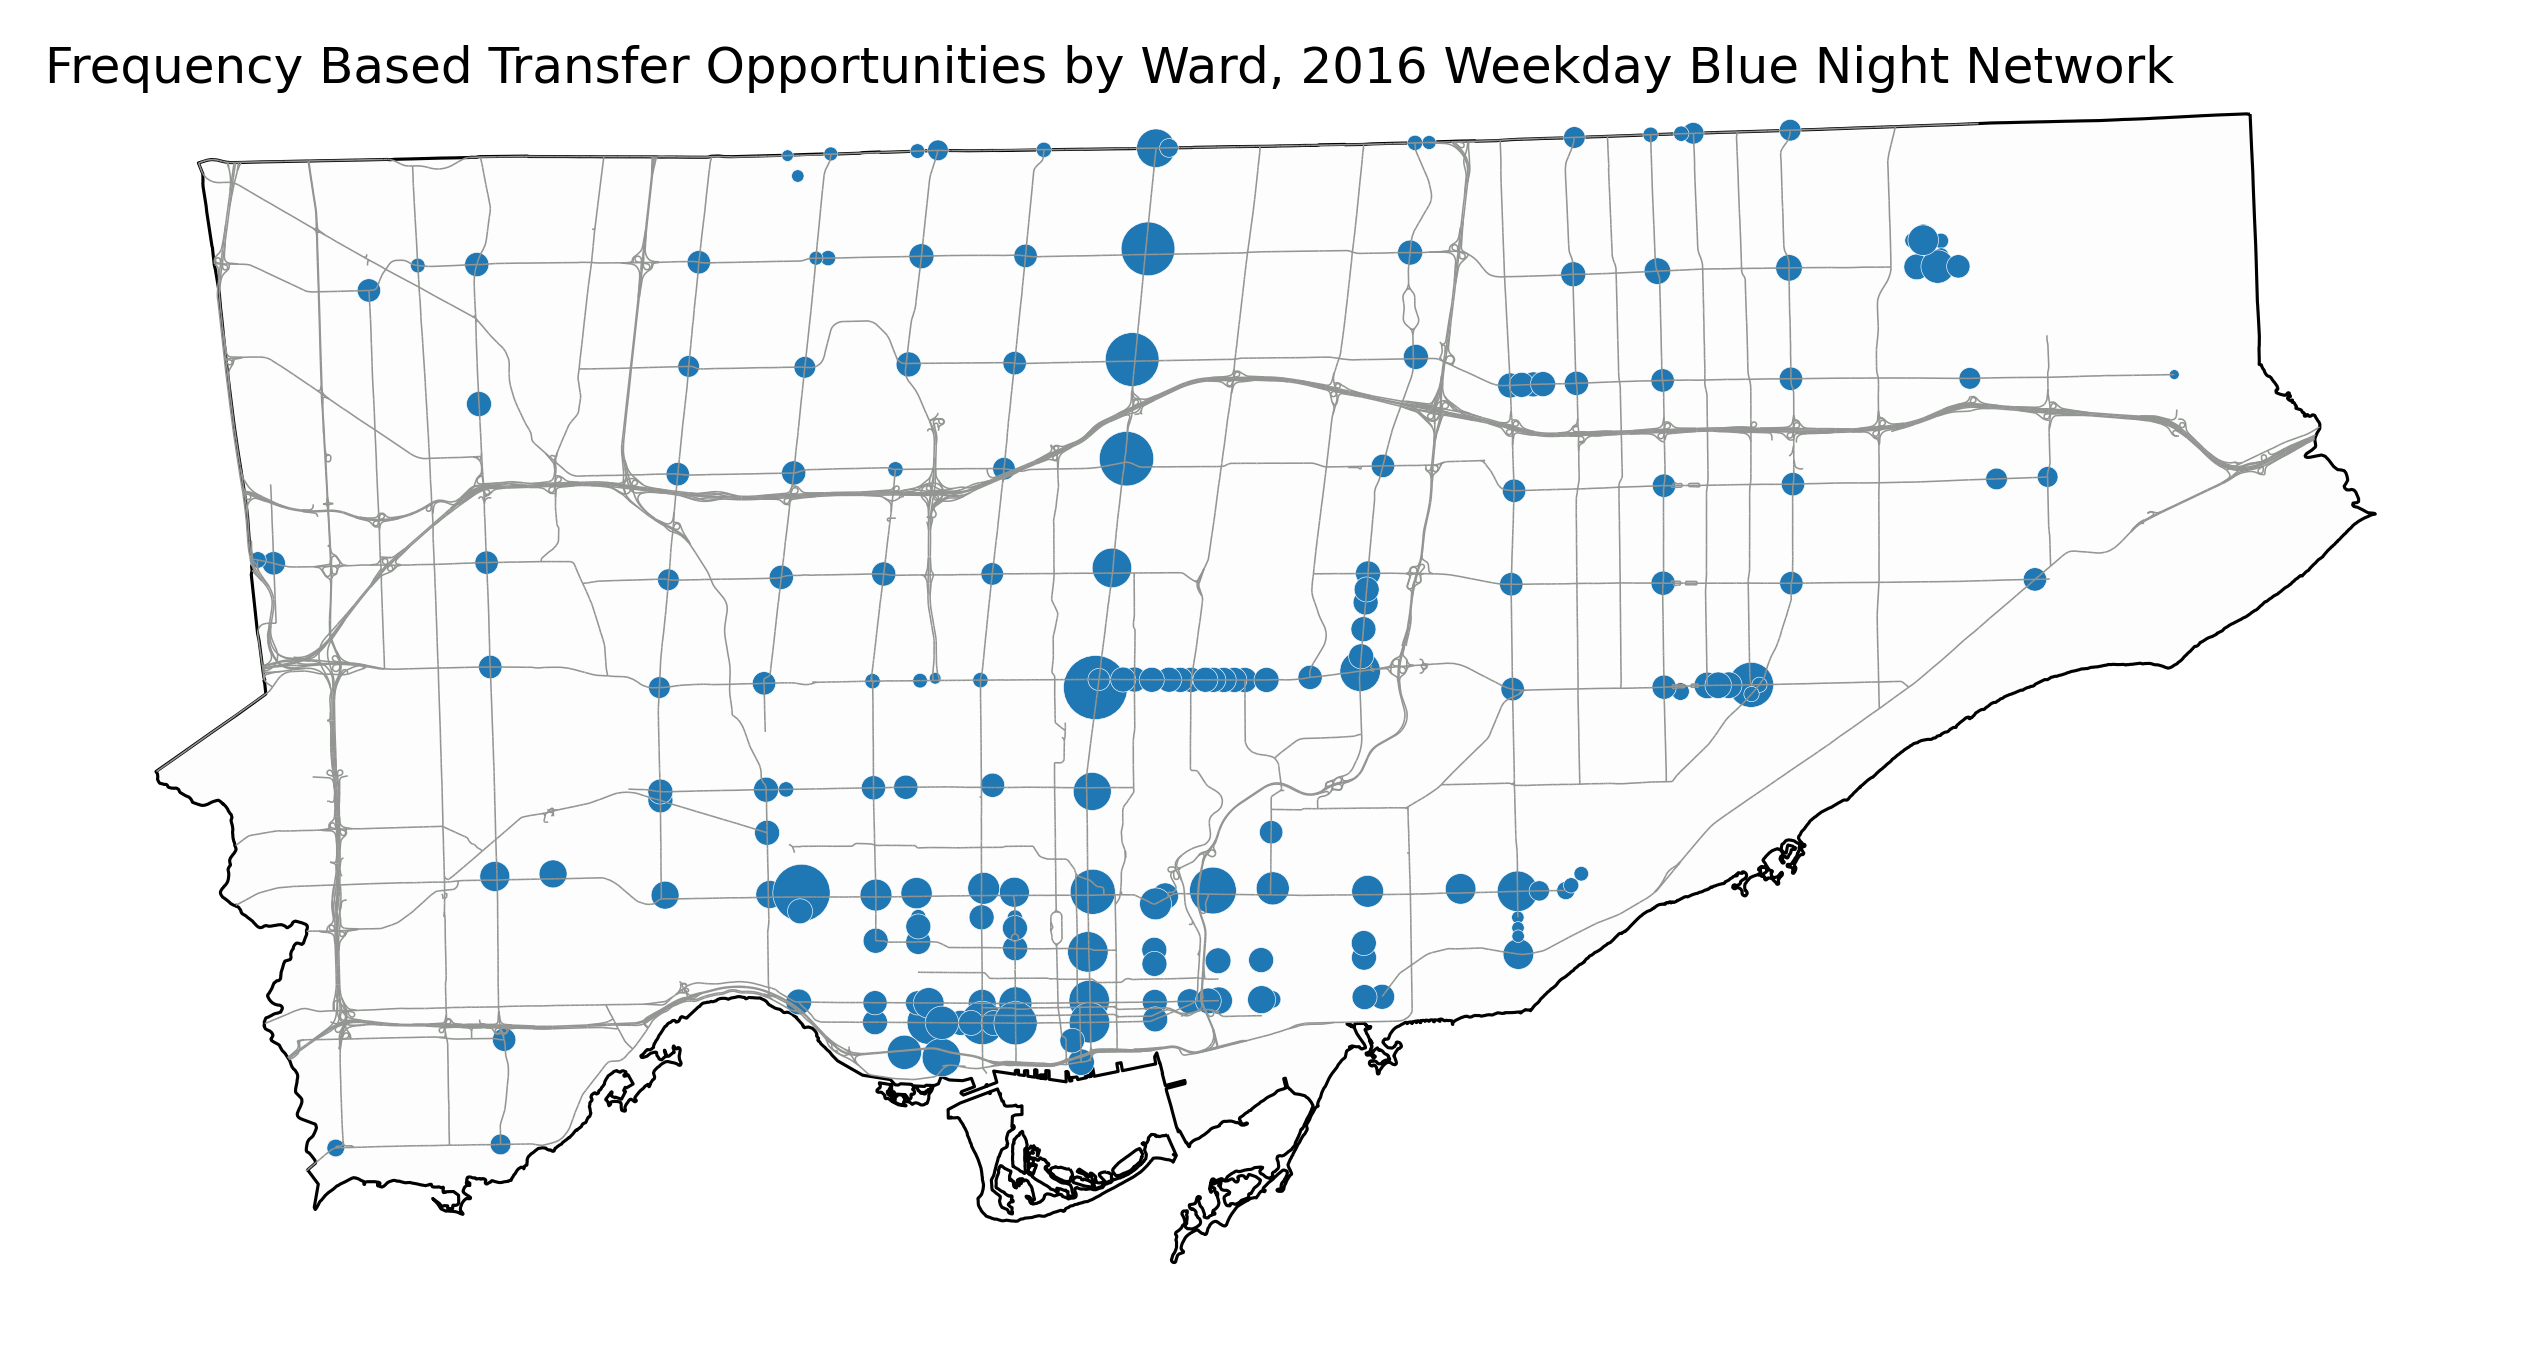

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(7,4)

to.plot(zorder = 0, ax = ax, color = 'xkcd:pale grey', linewidth = 0.5, edgecolor = 'k')

transfer_poss.plot(zorder = 1, ax = ax,edgecolor = 'w', linewidth = 0.1, 
                  markersize = 2*(transfer_poss['transfer-poss']))

expressway.plot(zorder = 1, ax = ax, edgecolor = 'xkcd:grey', linewidth = 0.25)
major_arterial.plot(zorder = 1, ax = ax, edgecolor = 'xkcd:grey', linewidth = 0.25)
#tts.plot(zorder = 1, ax = ax, color = 'xkcd:green')

ax.set_title('Frequency Based Transfer Opportunities by Ward, 2016 Weekday Blue Night Network', ha = 'left', x = 0, y = 0.95, fontsize = 8)

ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_axis_off()

In [37]:
transfer_poss['transfer-poss_rel'] = transfer_poss['transfer-poss']/transfer_poss['transfer-poss'].max()

/Users/Rick/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/Rick/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


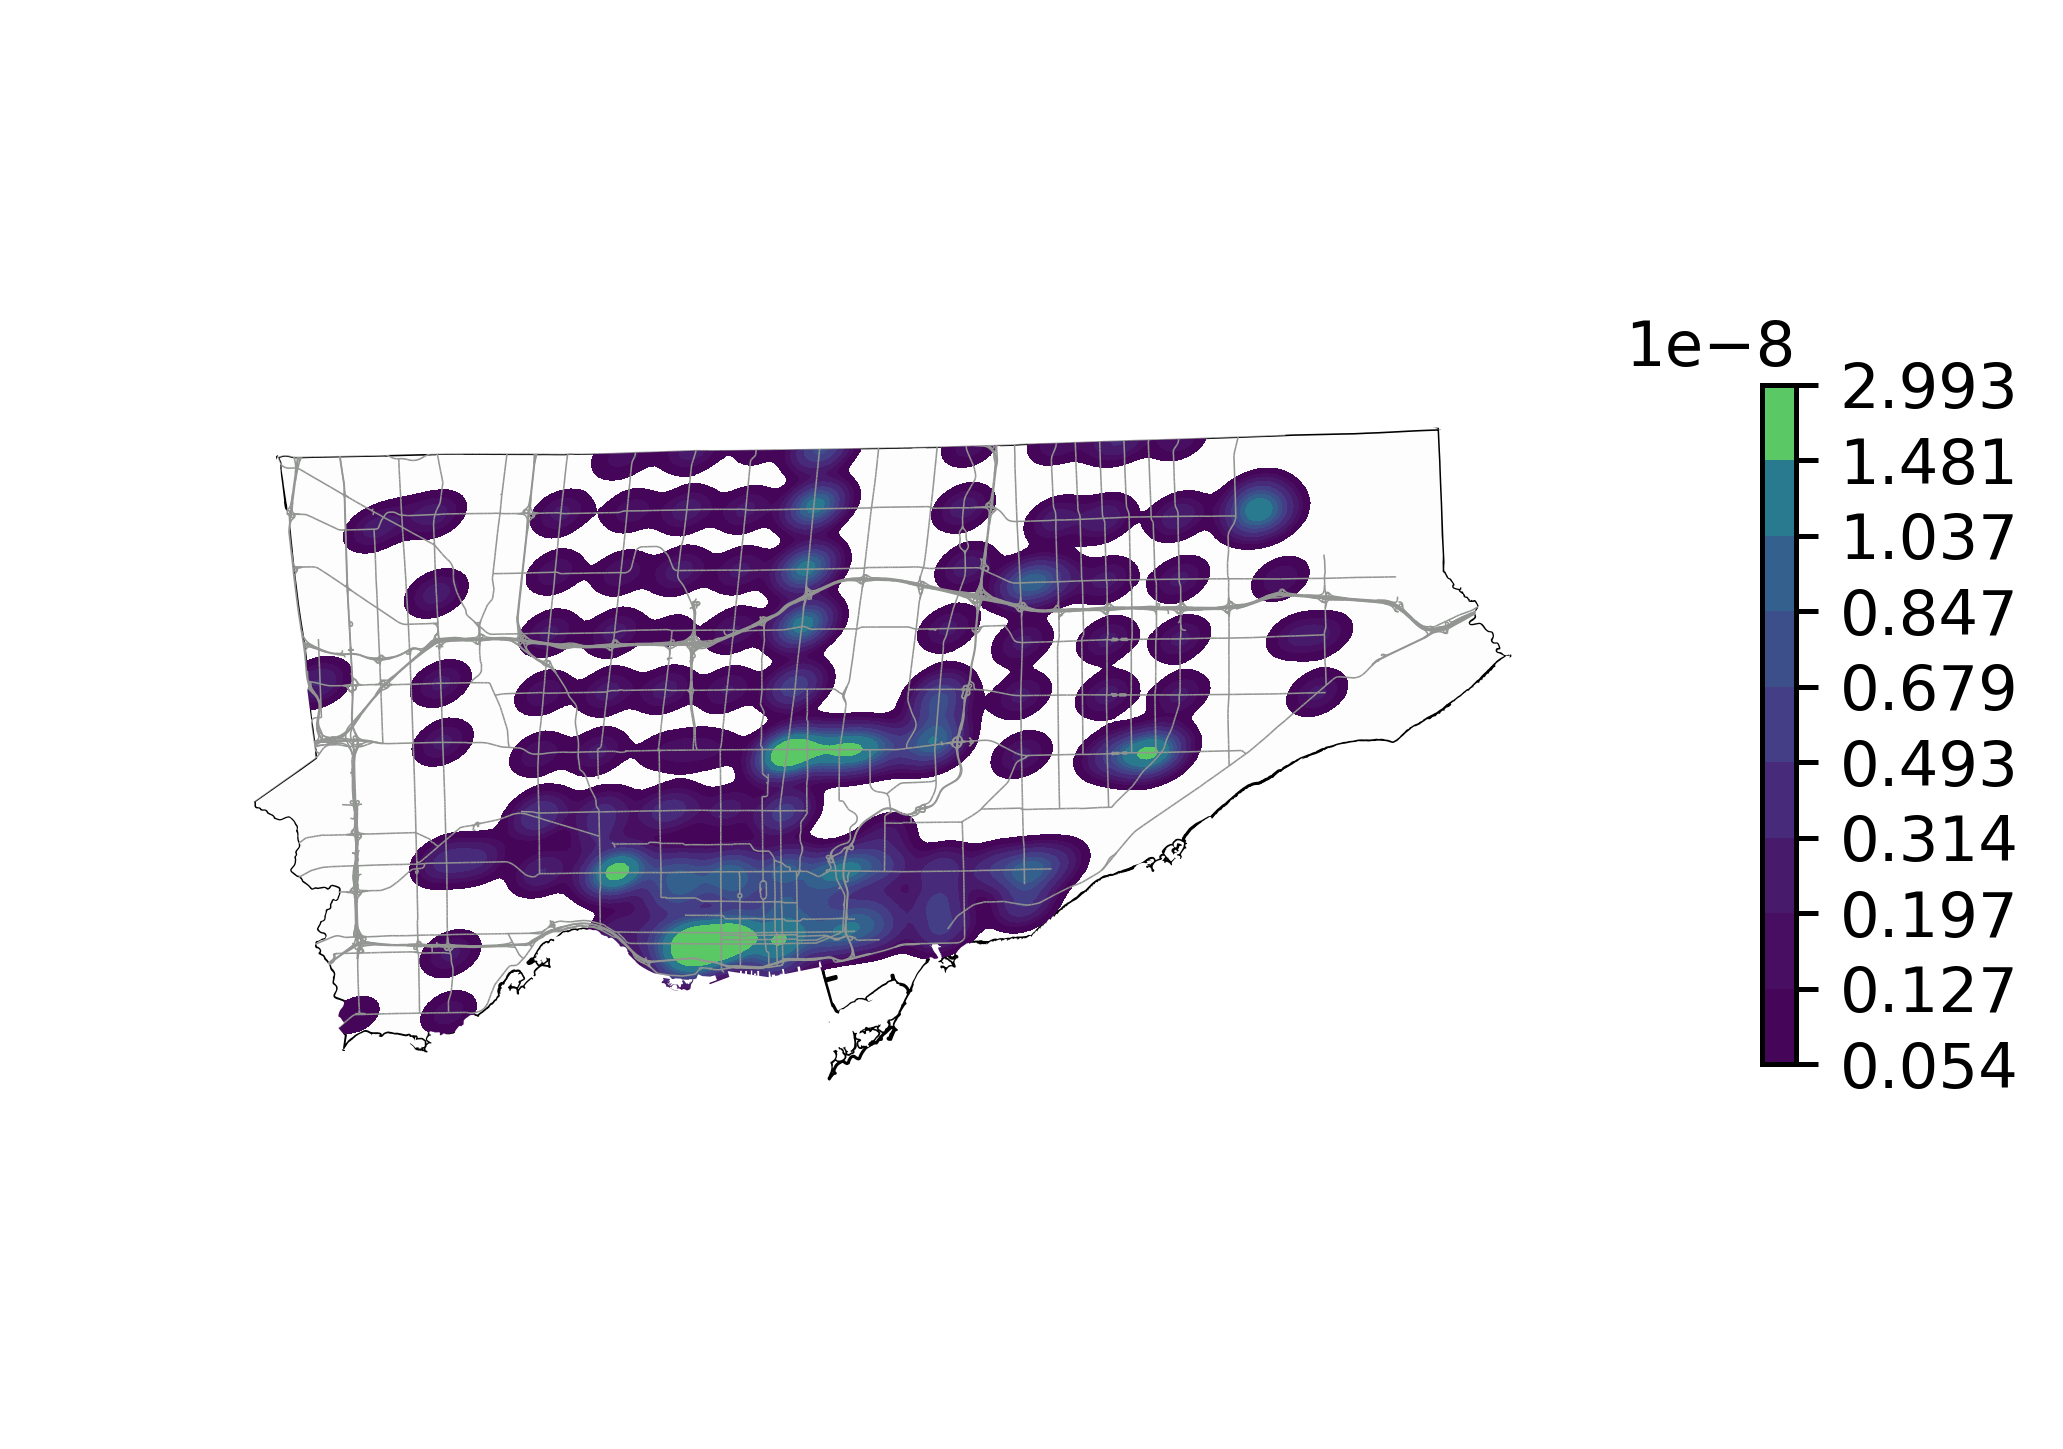

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(7,4)


to.plot(zorder = 0, ax = ax, color = 'xkcd:pale grey', linewidth = 0.5, edgecolor = 'k')
expressway.plot(zorder = 1, ax = ax, edgecolor = 'xkcd:grey', linewidth = 0.25)
major_arterial.plot(zorder = 1, ax = ax, edgecolor = 'xkcd:grey', linewidth = 0.25)

sns.kdeplot(transfer_poss['geometry'].x, transfer_poss['geometry'].y, weights = transfer_poss['transfer-poss']
           , shade = True, cmap = 'viridis', ax = ax, shade_lowest = False, bw_adjust = 0.2, zorder = 0, 
            cbar = True, cbar_kws={"shrink": 0.5})

un_to_gdf.plot(ax = ax, color = 'w', zorder = 2)

ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_axis_off()